In [1]:
import pandas as pd
import warnings
import numpy as np
warnings.filterwarnings("ignore")
# import feather


In [34]:
# yellow taxis
y_1801 = pd.read_csv("../raw_data/green_tripdata_2018-03.csv")

In [35]:
y_1801

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-03-01 00:07:46,2018-03-01 00:22:02,N,1,77,91,1,2.92,12.0,0.5,0.5,0.00,0.00,NaN,0.3,13.30,1,1
1,1,2018-03-01 00:31:29,2018-03-01 00:56:08,N,1,127,226,2,12.00,35.5,0.5,0.5,8.50,5.76,NaN,0.3,51.06,1,1
2,2,2018-03-01 00:12:00,2018-03-01 00:28:24,N,1,256,181,5,4.72,0.0,0.0,0.0,0.00,0.00,NaN,0.0,0.00,2,1
3,2,2018-03-01 00:43:57,2018-03-01 00:58:38,N,1,65,62,5,3.93,14.0,0.5,0.5,3.06,0.00,NaN,0.3,18.36,1,1
4,2,2018-03-01 00:08:00,2018-03-01 00:12:55,N,1,255,112,1,1.39,6.0,0.5,0.5,0.00,0.00,NaN,0.3,7.30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837144,2,2018-03-31 23:52:38,2018-03-31 23:55:05,N,1,127,127,1,0.53,4.0,0.5,0.5,0.00,0.00,NaN,0.3,5.30,2,1
837145,2,2018-03-31 23:32:05,2018-03-31 23:37:44,N,1,241,265,1,2.63,9.5,0.5,0.5,0.00,0.00,NaN,0.3,10.80,2,1
837146,2,2018-03-31 23:33:52,2018-03-31 23:39:00,N,1,41,42,1,1.15,6.0,0.5,0.5,1.46,0.00,NaN,0.3,8.76,1,1
837147,2,2018-03-31 23:14:04,2018-03-31 23:35:36,N,1,41,107,1,7.15,23.0,0.5,0.5,0.00,0.00,NaN,0.3,24.30,2,1


In [36]:
# preprocessing
# get rid of passeenger_count = 0
y_1801 = y_1801[y_1801['passenger_count'] != 0]

# get rid of trip_distance = 0
y_1801 = y_1801[y_1801['trip_distance'] != 0]

# get rid of fare_amount(total_amount) < 2.5
y_1801 = y_1801[y_1801['fare_amount'] >= 2.5]

#  invalid payment_type (3,6)
y_1801 = y_1801[(y_1801['payment_type'] != 3) & (y_1801['payment_type'] != 6)]

# get rid of PULocationID & DOLocationID not in [1,265]
y_1801 = y_1801[(y_1801['PULocationID'] >= 1) & (y_1801['DOLocationID'] >= 1)&(y_1801['PULocationID'] <= 265) & (y_1801['DOLocationID'] <=265)]

# get rid of out-of-scope time
y_1801 = y_1801[(y_1801['lpep_pickup_datetime'].str[5] == '0') & (y_1801['lpep_pickup_datetime'].str[6] == '3') & (y_1801['lpep_pickup_datetime'].str[0:4] == '2018')]



In [37]:
y_1801.sort_values('lpep_pickup_datetime')


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type
43,2,2018-03-01 00:00:00,2018-03-01 00:00:00,N,1,256,144,1,2.52,10.0,0.5,0.5,0.00,0.0,NaN,0.3,11.30,1,1
1916,2,2018-03-01 00:00:00,2018-03-01 00:00:00,N,1,244,152,1,1.58,7.0,0.0,0.5,0.00,0.0,NaN,0.3,7.80,2,1
15,2,2018-03-01 00:00:14,2018-03-01 00:09:39,N,1,181,61,1,3.03,10.5,0.5,0.5,0.00,0.0,NaN,0.3,11.80,2,1
73,2,2018-03-01 00:00:17,2018-03-01 00:01:45,N,1,42,42,2,0.41,3.5,0.5,0.5,0.96,0.0,NaN,0.3,5.76,1,1
163,2,2018-03-01 00:00:20,2018-03-01 00:16:41,N,1,7,134,5,9.11,26.5,0.5,0.5,6.95,0.0,NaN,0.3,34.75,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
835562,2,2018-03-31 23:59:47,2018-04-01 00:09:25,N,1,33,79,1,2.82,11.0,0.5,0.5,3.08,0.0,NaN,0.3,15.38,1,1
835924,2,2018-03-31 23:59:49,2018-04-01 00:12:11,N,1,168,242,1,4.62,15.5,0.5,0.5,0.00,0.0,NaN,0.3,16.80,2,1
836213,2,2018-03-31 23:59:50,2018-04-01 00:08:15,N,1,181,195,6,2.30,9.0,0.5,0.5,0.00,0.0,NaN,0.3,10.30,2,1
836557,1,2018-03-31 23:59:51,2018-04-01 00:19:30,N,1,65,236,1,9.10,27.5,0.5,0.5,5.76,0.0,NaN,0.3,34.56,1,1


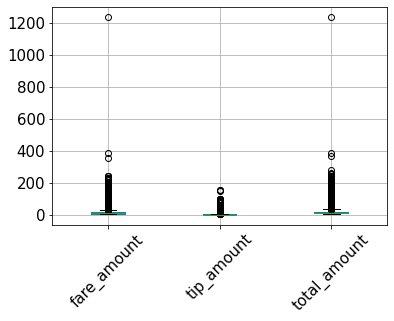

In [38]:
amount = ['fare_amount', 'tip_amount', 'total_amount']
amount_boxplot = y_1801.boxplot(column = amount, rot = 45, fontsize = 15)

In [7]:
# y_1801[(y_1801['extra'] != 0) & (y_1801['extra'] != 0.5) & (y_1801['extra'] != 1)]
# 存疑，extra可以有除了0.5和1和0之外的数字？

In [39]:
Q1 = y_1801.quantile(0.25)
Q3 = y_1801.quantile(0.75)
IQR = Q3 - Q1
clean_y_1801 = y_1801[~((y_1801 < (Q1 - 5 * IQR)) |(y_1801 > (Q3 + 5 * IQR))).any(axis=1)]


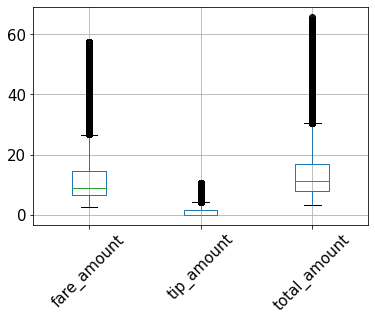

In [40]:
clean_fee_boxplot = clean_y_1801.boxplot(column = amount, rot = 45, fontsize = 15)

In [41]:
clean_y_1801 = clean_y_1801.drop('ehail_fee',axis=1)

In [42]:
clean_y_1801.isnull().sum()

VendorID                 0
lpep_pickup_datetime     0
lpep_dropoff_datetime    0
store_and_fwd_flag       0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
payment_type             0
trip_type                0
dtype: int64

In [43]:
clean_y_1801

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type
0,2,2018-03-01 00:07:46,2018-03-01 00:22:02,N,1,77,91,1,2.92,12.0,0.5,0.5,0.00,0.0,0.3,13.30,1,1
4,2,2018-03-01 00:08:00,2018-03-01 00:12:55,N,1,255,112,1,1.39,6.0,0.5,0.5,0.00,0.0,0.3,7.30,1,1
5,2,2018-03-01 00:20:09,2018-03-01 00:40:32,N,1,112,181,1,7.13,23.0,0.5,0.5,0.00,0.0,0.3,24.30,1,1
6,2,2018-03-01 00:54:07,2018-03-01 00:59:25,N,1,40,54,1,0.87,5.5,0.5,0.5,0.00,0.0,0.3,6.80,2,1
9,2,2018-03-01 00:22:06,2018-03-01 00:27:08,N,1,255,112,1,1.07,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837142,2,2018-03-31 23:27:39,2018-03-31 23:34:41,N,1,97,112,1,3.83,12.0,0.5,0.5,2.66,0.0,0.3,15.96,1,1
837144,2,2018-03-31 23:52:38,2018-03-31 23:55:05,N,1,127,127,1,0.53,4.0,0.5,0.5,0.00,0.0,0.3,5.30,2,1
837145,2,2018-03-31 23:32:05,2018-03-31 23:37:44,N,1,241,265,1,2.63,9.5,0.5,0.5,0.00,0.0,0.3,10.80,2,1
837146,2,2018-03-31 23:33:52,2018-03-31 23:39:00,N,1,41,42,1,1.15,6.0,0.5,0.5,1.46,0.0,0.3,8.76,1,1


In [44]:
clean_y_1801.reset_index().to_feather('../preprocessed_data/g_1803.feather')